# 数据科学编程实验Ⅱ-Python实践

## Assignment 4: Network

## 聂嘉一 320200931181

## 1. Implement the following indicators

### 1.1 Degree centrality

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
             [1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
             [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
             [1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
             [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
             [1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
             [0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
             [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
             [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

mat_size = len(A)
nodeList = ['Andre', 'Beverly', 'Carol', 'Diane', 'Ed', 'Fernando', 'Garth', 'Heather', 'Ike', 'Jane']

In [3]:
# creating a copy of Graph A:
temp = A.copy()

# to perform Summation of any Row:
def sum_of_row(graph, a):
    degSum = 0
    # Summing all columns in the row
    for column in range(mat_size):
        degSum += graph[a,column]
    return degSum
        
# Calculate Degree Centrality:
def degreeCentrality(a):
    degSum = sum_of_row(temp, a)
    # dividing the sum of the degree with the (n-1) nodes
    result = (degSum/(mat_size-1))
    # We return a single number.
    return round(result,3)

# Calculate for all Nodes
degreeCentralityValues = [degreeCentrality(a) for a in range(mat_size)]

for i in range(10):
    print("The Degree Centralities of",nodeList[i],":",degreeCentralityValues[i])

The Degree Centralities of Andre : 0.444
The Degree Centralities of Beverly : 0.444
The Degree Centralities of Carol : 0.333
The Degree Centralities of Diane : 0.667
The Degree Centralities of Ed : 0.333
The Degree Centralities of Fernando : 0.556
The Degree Centralities of Garth : 0.556
The Degree Centralities of Heather : 0.333
The Degree Centralities of Ike : 0.222
The Degree Centralities of Jane : 0.111


### 1.2 Betweenness centrality

In [4]:
from copy import deepcopy
import re
import itertools
import math

ROLLNUM_REGEX = "201[0-9]{4}"

class Graph(object):
    name = "AYUSH GOEL"
    email = "ayush18029@iiitd.ac.in"
    roll_num = "2018029"

    def __init__ (self, vertices, edges):
        """
            Contructor for the class graph!
            Constructs the object for the class.
        """

        self.vertices = vertices
        
        ordered_edges = list(map(lambda x: (min(x), max(x)), edges))
        
        self.edges    = ordered_edges
        
        self.validate()

    def validate(self):
        """
            This function checks
            for the validity of
            the inputs.
            It raises an error otherwise.
        """
        if (not isinstance(self.name, str)) or self.name == "":
            st="Name can't be empty"
            raise Exception(st)

        if (not isinstance(self.email, str)) or self.email == "":
            st="Email can't be empty"
            raise Exception(st)

        if (not isinstance(self.roll_num, str)) or (not re.match(ROLLNUM_REGEX, self.roll_num)):
            st="Invalid roll number, roll number must be a string of form 201XXXX. Provided roll number: {}"
            raise Exception(st.format(self.roll_num))

        if not all([isinstance(node, int) for node in self.vertices]):
            st="All vertices should be integers"
            raise Exception(st)

        elif len(self.vertices) != len(set(self.vertices)):
            duplicate_vertices = set([node for node in self.vertices if self.vertices.count(node) > 1])
            st="Vertices contain duplicates.\nVertices: {}\nDuplicate vertices: {}"
            raise Exception(st.format(vertices, duplicate_vertices))

        edge_vertices = list(set(itertools.chain(*self.edges)))

        if not all([node in self.vertices for node in edge_vertices]):
            st="All endpoints of edges must belong in vertices"
            raise Exception(st)

        if len(self.edges) != len(set(self.edges)):
            duplicate_edges = set([edge for edge in self.edges if self.edges.count(edge) > 1])
            st="Edges contain duplicates.\nEdges: {}\nDuplicate vertices: {}"
            raise Exception(st.format(edges, duplicate_edges))

    def isadjto(self,a,b):
        """
            This funtion checks if two nodes are 
            adjacent to 
            each other or not.
            Returns true if they are
            adjacent and false
            otherwise.
        """
        if((a,b) in self.edges or (b,a) in self.edges):
            return True
        else:
            return False

    def allpaths(self,start_node):
        """
            This function takes a start node 
            as an argument and returns
            all the possible paths for all
            the possible end nodes.
            The paths are returned as 
            lists.
        """
        paths=[[start_node]]
        a=len(self.vertices)
        b=len(self.vertices)
        c=len(self.vertices)
        while(a>0):
            for j in self.vertices:
                for i in paths:
                    if(self.isadjto(i[-1],j) and j not in i and i+[j] not in paths):
                        paths.append(i+[j])
            a-=1
        return paths

    def min_dist(self, start_node, end_node):
        """
            This function takes start node 
            and end node as arguments.
            It returns the minimum distance between
            the two nodes using all the paths retrieved
            from the allpaths function.
            The minimum distance is returned as integer.
        """
        l=[]
        for i in self.allpaths(start_node):
            if(i[-1]==end_node):
                l.append(i)
        min1=len(self.vertices)+1
        for i in l:
            if(len(i)<min1):
                min1=len(i)

        return min1-1


    def all_shortest_paths(self,start_node, end_node):
        """
            This function takes start node and
            end node as argumenst and returns a list
            of all the shortest path between
            the two nodes.
        """

        a=self.allpaths(start_node)
        l=[]
        for i in a:
            if(i[-1]==end_node):
                l.append(i)
        min1=len(self.vertices)+1
        for i in l:
            if(len(i)<min1):
                min1=len(i)
        q=[]
        for i in l:
            if(len(i)==min1):
                q.append(i)
        return q

    def betweenness_centrality(self, node):
        """
            This function takes a node as an argument
            and returns the betweeness centrality
            for the given node in the graph.

        """
        li=[]
        for i in self.vertices:
            if(i!=node):
                for j in self.vertices:
                    if(i!=j and j!=node):
                        a=self.all_shortest_paths(i,j)
                        x=len(a)
                        y=0
                        for o in a:
                            for u in o:
                                if(u==node):
                                    y+=1
                        li.append(y/x)
        return sum(li)/2

    def sta(self,node):
        """
            This function takes a node as an argument and
            returns the standard betweeness centrality for the
            node in the graph.
            It also round it to 4 decimal places.
        """
        n=len(self.vertices)
        return round(2*self.betweenness_centrality(node)/((n-1)*(n-2)),4)
        

    def top_k_betweenness_centrality(self):
        """
            This function takes no arguments.
            It returns the nodes having the highest 
            standard betweeness centrality along with
            its bc.
        """

        ans=[]

        yoyo=[]
        for u in self.vertices:
            yoyo.append([self.sta(u),u])
        qwerty=yoyo[0][0]
        for i in yoyo:
            if(qwerty<i[0]):
                qwerty=i[0]

        for i in yoyo:
            if(i[0]==qwerty):
                ans.append(i)

        return ans        


if __name__ == "__main__":
    """
    ***Main function***
    """
    vertices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    edges    = [(1, 2),(1, 3),(1, 4),(1, 6),(2, 5),(2, 6),(3, 4),(3, 6),(4, 5),(4, 6), (4, 7), (5,7),(6,7),(7,8),(8,9),(9,10)]
    graph = Graph(vertices, edges)
    print(graph.top_k_betweenness_centrality())

[[0.5093, 7]]


### 1.3 Closeness centrality

In [5]:
# Using NetworkX only to calculate the shortest path:
import networkx as nx

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_matrix(temp)

def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath
            
def closenessCentrality(b):
    closeSum = sum_of_row(step_mat, b)
    # dividing the (n-1) nodes with the sum of the closeness_values 
    result = ((mat_size-1)/closeSum)
    # We return a single number.
    return round(result,3)

step_mat = np.zeros((mat_size,mat_size))
step_betn_nodes(step_mat)
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]

for i in range(10):
    print("Closeness Centralities of",nodeList[i],":",closenessCentralityValues[i])

Closeness Centralities of Andre : 0.529
Closeness Centralities of Beverly : 0.529
Closeness Centralities of Carol : 0.5
Closeness Centralities of Diane : 0.6
Closeness Centralities of Ed : 0.5
Closeness Centralities of Fernando : 0.643
Closeness Centralities of Garth : 0.643
Closeness Centralities of Heather : 0.6
Closeness Centralities of Ike : 0.429
Closeness Centralities of Jane : 0.31


## 2.Comparing the Computed values with the Networkx solutions: 

In [11]:
# Converting the graph to a NetworkX Graph:
H = nx.from_numpy_matrix(A)

In [13]:
degreeCentralityValues = [degreeCentrality(a) for a in range(mat_size)]
print("Calculated Degree Centralities: \n", degreeCentralityValues)
print("\nNetworkX Degree Centralities: \n", nx.degree_centrality(H))


closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("\n")
print("Calculated Closeness Centralities: \n", closenessCentralityValues)
print("\nNetworkX Closeness Centralities: \n", nx.closeness_centrality(H))

Calculated Degree Centralities: 
 [0.444, 0.444, 0.333, 0.667, 0.333, 0.556, 0.556, 0.333, 0.222, 0.111]

NetworkX Degree Centralities: 
 {0: 0.4444444444444444, 1: 0.4444444444444444, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 0.3333333333333333, 5: 0.5555555555555556, 6: 0.5555555555555556, 7: 0.3333333333333333, 8: 0.2222222222222222, 9: 0.1111111111111111}


Calculated Closeness Centralities: 
 [0.529, 0.529, 0.5, 0.6, 0.5, 0.643, 0.643, 0.6, 0.429, 0.31]

NetworkX Closeness Centralities: 
 {0: 0.5294117647058824, 1: 0.5294117647058824, 2: 0.5, 3: 0.6, 4: 0.5, 5: 0.6428571428571429, 6: 0.6428571428571429, 7: 0.6, 8: 0.42857142857142855, 9: 0.3103448275862069}


## 3.Plotting

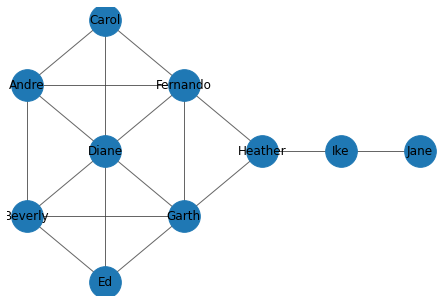

In [43]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt 
import networkx as nx
import numpy as np
import queue
import colorsys


def ShapelyBetweeness(G):
    #Distance between nodes
    d = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    #list of predecessors on all node pairs
    Pred_s = [[] for i in range(G.number_of_nodes()) ] 
    #Length of shortest path on each pair
    sigma = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    #One-side dependency of source node on target node
    delta = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    cSh = np.zeros(G.number_of_nodes()) 
    #Sructs
    Q = queue.Queue()
    S = []
    #Create node list
    nodes = []
    for n in G.nodes.data():
        nodes.append(n[0])
    for s in range(0, G.number_of_nodes()):
        for v in range(0, G.number_of_nodes()):
            Pred_s[v] = []; d[s,v] = float("inf"); sigma[s,v] = 0
        d[s,s] = 1; sigma[s,s] = 1;  
        Q.put(s)
        #Calulate short paths - num and distance
        while Q.empty() == False:
            v = Q.get()
            S.append(v)
            w = list(G.edges(nodes[v], data=True))
            for i in range(0,len(w)):
                if d[s, nodes.index(w[i][1])] == float("inf"):
                    d[s, nodes.index(w[i][1])] = d[s, v] + 1
                    Q.put(nodes.index(w[i][1]))
                if d[s, nodes.index(w[i][1])] == d[s, v] + 1:
                    sigma[s,nodes.index(w[i][1])] += sigma[s,v]
                    Pred_s[nodes.index(w[i][1])].append(v)

        for v in range(0, G.number_of_nodes()-1):
            delta[s,v] = 0

        #Calculate contribution
        while len(S) > 0:
            w = S.pop()
            for v in Pred_s[w]:
                delta[s,v] += (sigma[s,v]/sigma[s,w])*(1/d[s,w] + delta[s,w])
            if w != s:
                cSh[w] += delta[s,w] + (2-d[s,w])/d[s,w]

    for v in range(0, G.number_of_nodes()):
        cSh[v] = cSh[v]/2

    return cSh

G=nx.Graph()
G.add_edge('Andre', 'Beverly')
G.add_edge('Andre', 'Carol')
G.add_edge('Andre', 'Diane')
G.add_edge('Andre', 'Fernando')
# G.add_edge('Beverly', 'Andre')
G.add_edge('Beverly', 'Diane')
G.add_edge('Beverly', 'Ed')
G.add_edge('Beverly', 'Garth')
G.add_edge('Carol', 'Diane')
G.add_edge('Carol', 'Fernando')
G.add_edge('Diane', 'Ed')
G.add_edge('Diane', 'Fernando')
G.add_edge('Diane', 'Garth')
G.add_edge('Ed', 'Garth')
G.add_edge('Fernando', 'Garth')
G.add_edge('Fernando', 'Heather')
G.add_edge('Garth', 'Heather')
G.add_edge('Heather', 'Ike')
G.add_edge('Ike', 'Jane')

pos = {'Andre':[-.1,.1], 'Beverly':[-.1,-.1], 'Carol':[0,.2], 'Diane':[0,0], 'Ed':[0,-.2], 
       'Fernando':[.1,.1], 'Garth':[.1,-.1], 'Heather':[.2,0], 'Ike':[.3,0], 'Jane':[.4,0]}

cSh = ShapelyBetweeness(G)
nx.draw(G, pos, with_labels=True, edge_color=[.25,.25,.25,.8], font_color=[0,0,0,1], node_size=1000)